In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
nba = pd.read_csv("nba_data.csv")
nba.columns


Index(['Unnamed: 0', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

In [158]:
nba = nba.drop(['Rk', 'Unnamed: 0'], axis = 1)
nba = nba.rename(columns={"Pos": "Position", "Tm": "Team","G":"Games","GS":"Games_Started","MP":"Minutes"})
nba = nba.rename(columns={"FG": "Field_Goals", "FGA": "FG_Attempts","FT":"Free_Throws"})

nba.head()

,Player,Position,Age,Team,Games,Games_Started,Minutes,Field_Goals,FG_Attempts,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73.0,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76.0,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56.0,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32.0,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47.0,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [172]:
#nba.loc[4:] = nba[4:].apply(pd.to_numeric)
nba["Minutes"] = pd.to_numeric(nba["Minutes"],errors="coerce")
nba["Field_Goals"] = pd.to_numeric(nba["Field_Goals"],errors="coerce")
nba["FG_Attempts"] = pd.to_numeric(nba["FG_Attempts"],errors="coerce")
nba["FG%"] = pd.to_numeric(nba["FG%"],errors="coerce")
nba["FT%"] = pd.to_numeric(nba["FT%"],errors="coerce")

nba["PTS"] = pd.to_numeric(nba["PTS"],errors="coerce")
nba["FG%"] = pd.to_numeric(nba["FG%"],errors="coerce")
nba["AST"] = pd.to_numeric(nba["AST"],errors="coerce")
nba["TOV"] = pd.to_numeric(nba["TOV"],errors="coerce")
nba["BLK"] = pd.to_numeric(nba["BLK"],errors="coerce")
nba["Age"] = pd.to_numeric(nba["Age"],errors="coerce")
nba["Games"] = pd.to_numeric(nba["Games"],errors="coerce")



nba.dtypes


Player            object
Position          object
Age              float64
Team              object
Games            float64
Games_Started     object
Minutes          float64
Field_Goals      float64
FG_Attempts      float64
FG%              float64
3P                object
3PA               object
3P%               object
2P                object
2PA               object
2P%               object
eFG%              object
Free_Throws       object
FTA               object
FT%              float64
ORB               object
DRB               object
TRB               object
AST              float64
STL               object
BLK              float64
TOV              float64
PF                object
PTS              float64
dtype: object

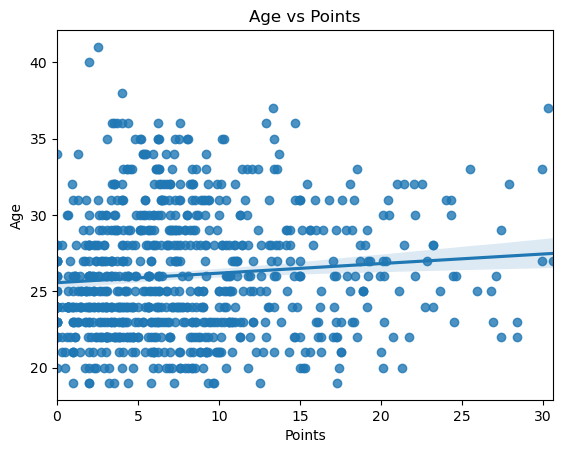

In [165]:
#nba["G"] = pd.to_numeric(nba["G"],errors="coerce")

players = nba[(nba.Games > 50)]
sns.regplot(data=nba, x='PTS', y='Age')
plt.xlabel('Points')
plt.title('Age vs Points');


In [166]:
#nba["Team"=="UTA"]
jazz = nba[(nba.Team == "UTA")]

jazz

,Player,Position,Age,Team,Games,Games_Started,Minutes,Field_Goals,FG_Attempts,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
7,Nickeil Alexander-Walker,SG,23.0,UTA,15.0,2,9.9,1.1,3.2,0.333,...,.917,0.1,1.5,1.5,1.1,0.3,0.3,0.5,1.0,3.5
29,Udoka Azubuike,C,22.0,UTA,17.0,6,11.5,2.2,2.9,0.755,...,.545,1.1,3.1,4.2,0.0,0.1,0.6,0.7,1.5,4.7
68,Bojan Bogdanović,PF,32.0,UTA,69.0,69,30.9,6.1,13.4,0.455,...,.858,0.8,3.4,4.3,1.7,0.5,0.0,1.7,1.7,18.1
109,Jared Butler,SG,21.0,UTA,42.0,1,8.6,1.5,3.6,0.404,...,.688,0.1,1.0,1.1,1.5,0.4,0.2,0.8,1.1,3.8
131,Zylan Cheatham,SF,26.0,UTA,1.0,0,5.0,0.0,3.0,0.000,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137,Jordan Clarkson,SG,29.0,UTA,79.0,1,27.1,5.9,14.1,0.419,...,.828,0.8,2.6,3.5,2.5,0.8,0.2,1.6,1.9,16.0
143,Mike Conley,PG,34.0,UTA,72.0,72,28.6,4.8,11.0,0.435,...,.796,0.7,2.4,3.0,5.3,1.3,0.3,1.7,2.0,13.7
229,Malik Fitts,PF,24.0,UTA,7.0,0,5.0,0.3,1.3,0.222,...,NaN,0.0,1.4,1.4,0.0,0.0,0.0,0.3,0.4,0.9
236,Trent Forrest,PG,23.0,UTA,60.0,6,12.8,1.3,2.6,0.490,...,.792,0.4,1.3,1.7,1.8,0.5,0.1,0.8,0.7,3.3
259,Rudy Gay,PF,35.0,UTA,55.0,1,18.9,2.9,6.9,0.414,...,.785,1.0,3.4,4.4,1.0,0.5,0.3,0.9,1.7,8.1


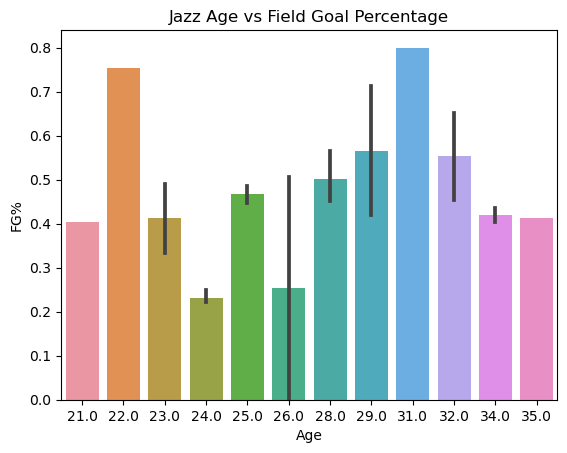

In [178]:
#Graphic 1
sns.barplot(data=jazz, x='Age', y='FG%')
plt.title('Jazz Age vs Field Goal Percentage');



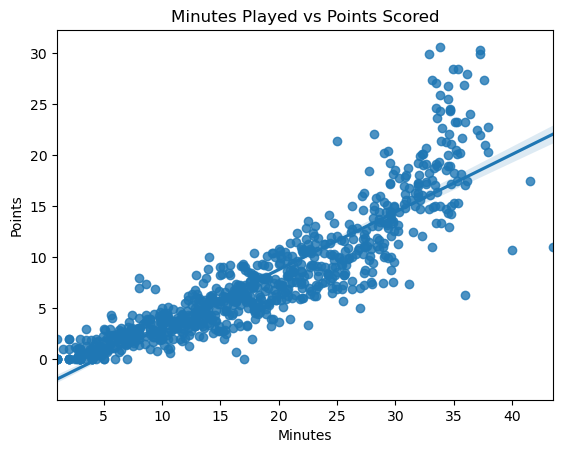

In [171]:
sns.regplot(data=nba, x = 'Minutes', y = 'PTS')
plt.title('Minutes Played vs Points Scored')
plt.ylabel("Points");

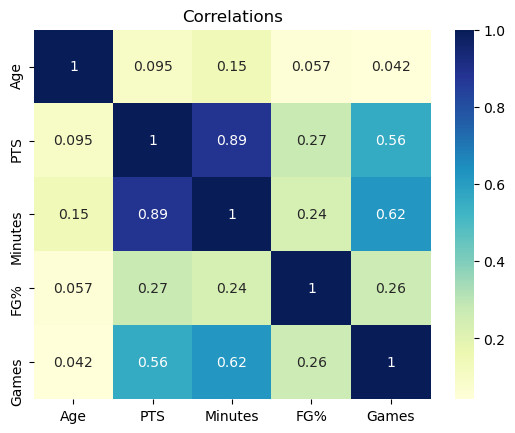

In [179]:
sns.heatmap(nba[['Age','PTS','Minutes','FG%','Games']].corr(), cmap="YlGnBu",annot = True)
plt.title("Correlations");


In [138]:
means = nba.groupby(['Team']).mean().BLK.plt()
#means

#forplot = wc.sort_values(by='count',ascending=False).head(20)
#plt.figure(figsize=(12,5))
#sns.barplot(x='word',y='count',data=forplot)

#sns.barplot(data=means, x = 'Team', y = 'BLK' )

AttributeError: 'Series' object has no attribute 'plt'

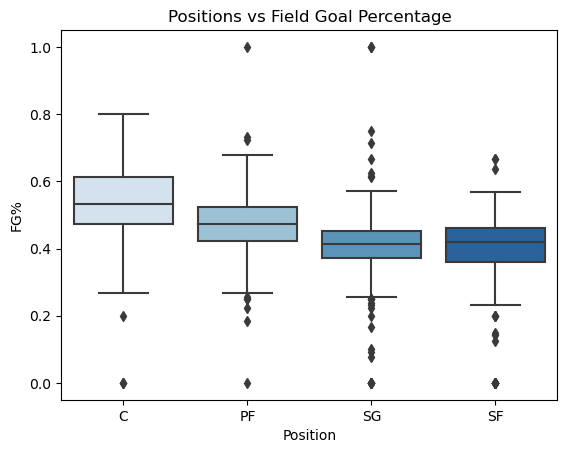

In [180]:
pos = nba[(nba.Position == "C")|(nba.Position == "PF")|(nba.Position == "SG")|(nba.Position == "SF")]
sns.boxplot(data=pos, x="Position", y="FG%",palette="Blues")
plt.title("Positions vs Field Goal Percentage");


In [ ]:
# steals and minutes
# minutes and points
# 3p 3PA
# Position and 3 point
# blocks vs position